# load the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
#read the dataset
dataset = pd.read_csv("wine-quality.csv")
# x will be all the columns excluding the last one
# y will be the last column
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

# standardize variables

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Partition the dataset

In [3]:
from sklearn.model_selection import train_test_split
# first split in the ratio of 75:25 then 80:20 so as to achieve 60/15/25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2021,stratify=y)
X_train_A, X_train_B, y_train_A, y_train_B = train_test_split(X_train, y_train, test_size = 0.20, 
                                                              random_state = 2021,stratify=y_train)

# Buliding KNN model and iterate on k range from 1 to 30

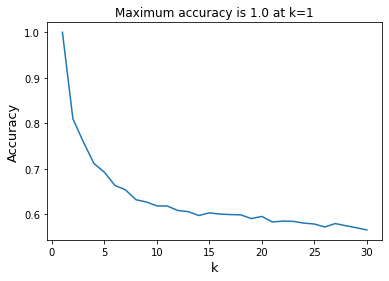

In [4]:
# for Training set A
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
acc=[] # list to store individual accuracy on different value of k
for  i in range(1,31,1):
    # n_neighbors is k
    
    # build the model
    classifier = KNeighborsClassifier(n_neighbors = i)
    #fit the model into X_train_A, y_train_A
    classifier.fit(X_train_A, y_train_A)
    # find accuracy on training set A
    score = classifier.score(X_train_A, y_train_A)
    # store individual accuracy
    acc.append(score)
    
# plot graph between k vs accuracy
# list(range(1,31,1)) it will create a list [1,2,3....30]
plt.plot(list(range(1,31,1)),acc)
plt.xlabel('k',fontsize=13)
plt.ylabel('Accuracy',fontsize=13)

# s is string to display custom title
s = 'Maximum accuracy is '+str(round(max(acc),3))+' at k=' + str(acc.index(max(acc))+1)
plt.title(s)
plt.show()

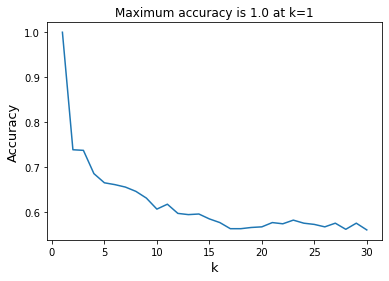

In [5]:
# for Training set B
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
acc=[] # list to store individual accuracy on different value of k
for  i in range(1,31,1):
    # n_neighbors is k
    
    # build the model
    classifier = KNeighborsClassifier(n_neighbors = i)
    #fit the model into X_train_B, y_train_B
    classifier.fit(X_train_B, y_train_B)
    # find accuracy on training set B
    score = classifier.score(X_train_B, y_train_B)
    # store individual accuracy
    acc.append(score)
    
# plot graph between k vs accuracy
# list(range(1,31,1)) it will create a list [1,2,3....30]
plt.plot(list(range(1,31,1)),acc)
plt.xlabel('k',fontsize=13)
plt.ylabel('Accuracy',fontsize=13)

# s is string to display custom title
s = 'Maximum accuracy is '+str(round(max(acc),3))+' at k=' + str(acc.index(max(acc))+1)
plt.title(s)
plt.show()

- k=1 produced the best accuracy for training set A training set B

# Generate prediction for the test partition at k=1

confusion matrix
[[  0   0   2   2   1   0   0]
 [  0  10  20   8   3   0   0]
 [  1  11 228 108  15   1   0]
 [  0  11 102 355  71  11   0]
 [  0   0   9  74 117  17   3]
 [  0   0   4  10  11  19   0]
 [  0   0   0   1   0   0   0]]


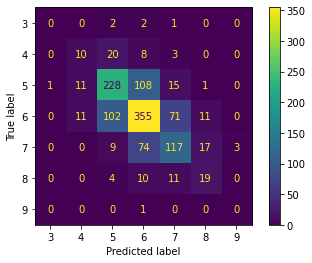

In [6]:
# consider the training set A,k=1 and build the model to predict for testset
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train_A, y_train_A)
y_pred = classifier.predict(X_test)
# model accuracy on test set
acc = accuracy_score(y_test, y_pred)
###you can also use this to print confusion matrix###
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
#####################################################
print('confusion matrix')
disp = plot_confusion_matrix(classifier, X_test, y_test)
print(disp.confusion_matrix)

# Dataframe with added column

In [7]:
# dataframe with added column
# list(dataset)[:-1] : list of column name
df = pd.DataFrame(X_test,columns=list(dataset)[:-1])
df['Quality'] = y_test
df['PredictedQuality'] = y_pred

In [8]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality,PredictedQuality
0,0.527639,-0.974766,-0.365197,-1.023637,-0.081131,-1.370628,0.109177,-0.744792,0.077712,-0.086290,0.638550,7,7
1,-1.368585,1.803445,1.039676,-0.984201,-0.264233,-0.253336,0.721032,-0.276659,-0.385910,-0.173921,-1.393152,5,5
2,0.053583,-0.379435,0.130641,-1.063073,0.285074,-0.018117,0.179776,-0.343535,1.733504,-0.436816,-0.417935,6,8
3,-0.183445,-0.280214,-0.034638,-0.688433,0.513951,0.981566,0.815164,-0.209783,-1.114458,-0.086290,-0.824276,7,8
4,0.646153,-1.173210,-0.530476,1.796020,0.193523,-0.606165,-0.079086,1.462122,-1.909238,-0.524447,-1.474421,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,1.357237,0.116674,-0.365197,1.342508,0.010421,-0.547361,-0.596809,1.428684,0.408870,-1.050236,-0.661739,6,6
1221,0.053583,0.612783,3.353583,0.948151,1.063257,0.511127,0.273907,0.927112,-1.246921,2.805551,-1.068080,5,5
1222,-0.301959,1.307336,-0.199917,-0.944765,-0.172682,-1.017799,-0.879204,-0.694635,-0.385910,-0.699710,-0.011595,5,6
1223,-0.894529,-1.718930,-0.199917,-1.003919,-0.401559,1.157980,0.156243,-0.945421,1.468577,-0.699710,0.476014,7,7


#  accuracy

In [9]:
# 0.595 means 59.5%
print('Accuracy of model on the test set',round(acc,3))

Accuracy of model on the test set 0.595


In [10]:
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.527639         -0.974766    -0.365197       -1.023637  -0.081131   
1         -1.368585          1.803445     1.039676       -0.984201  -0.264233   
2          0.053583         -0.379435     0.130641       -1.063073   0.285074   
3         -0.183445         -0.280214    -0.034638       -0.688433   0.513951   
4          0.646153         -1.173210    -0.530476        1.796020   0.193523   
...             ...               ...          ...             ...        ...   
1220       1.357237          0.116674    -0.365197        1.342508   0.010421   
1221       0.053583          0.612783     3.353583        0.948151   1.063257   
1222      -0.301959          1.307336    -0.199917       -0.944765  -0.172682   
1223      -0.894529         -1.718930    -0.199917       -1.003919  -0.401559   
1224       0.527639          0.017452     0.295920       -1.023637  -0.310008   

      free sulfur dioxide  